# Script Clase 1

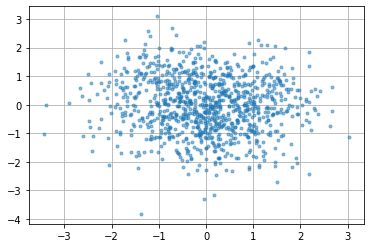

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generemos estructuras de dependencia: Normal Bivariante
mu = [0, 0] # Vector de medias
rho = -0.1 # Cantidad de correlación

sigma =  [[1, rho], [rho, 1]] # Matriz de covarianza
n = 1000 # Cantidad de datos, tamaño de muestra
X = np.random.multivariate_normal(mu, sigma, n)

plt.plot(X[:, 0], X[:, 1], '.', alpha=0.5)
plt.grid()
plt.show()

In [57]:
import imageio.v2 as imageio
import os


filenames = [] 
index = 0
for rho in np.linspace(-1, 1, 50):
    sigma =  [[1, rho], [rho, 1]] # Matriz de covarianza
    X = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots()
    plt.plot(X[:, 0], X[:, 1], '.', alpha=0.5)
    plt.grid()
    plt.title("rho {}".format(np.round(rho, 2)))
    #plt.show()
    for i in range(5):
        filename = f'{index} .png' 
        filenames.append(filename) 
        plt.savefig(filename)
        index = index + 1 
    plt .close()

# compilar gif 
with imageio.get_writer('mygif.gif', mode='I') as escritor: 
    for filename in filenames: 
        image = imageio.imread(filename) 
        escritor.append_data(image) 
        
# Eliminar archivos 
for filename in set(filenames): 
    os.remove(filename)

    

In [11]:
from scipy.stats import spearmanr, kendalltau
# Correlaciones
cor_p = np.corrcoef(X[:,0], X[:,1])[0, 1]
cor_sp, _ = spearmanr(X[:,0], X[:,1])
cor_k, _ = kendalltau(X[:,0], X[:,1])
print(cor_p, cor_sp, cor_k)

-0.8950211893510929 -0.8843764883764885 -0.704972972972973


## La Varianza Generalizada
Una medida global escalar de la variabilidad conjunta de k variables es la varianza
generalizada, que es el determinante de la matriz de varianzas y covarianzas. Su raíz
cuadrada se denomina **desviación típica generalizada**, y tiene las propiedades siguientes:
1.  Está bien definida, ya que el determinante de la matriz de varianzas y covarianzas
es siempre mayor o igual que 0.
2. Es una medida del área (para k = 2), volumen (para k = 3) o hipervolumen (para
k > 3) ocupado por el conjunto de datos.

In [14]:
# Desviación Típica Generalizada
cor_sp, _ = kendalltau(X[:,0], X[:,1]) ## varieemos el metodo del calculo de la correlación
S = [[1, cor_sp], [cor_sp, 1]] ## Construyendo la matriz de covarianzas
detS = np.linalg.det(S) ## Calculando el determinante
DTG = np.sqrt(detS) ## raiz del determinante
print(DTG)

0.9984032505297076


## Y ¿si los datos no estan correlados linealmente?

Para observar, si la estructura de dependencia es perfecta creciente o decreciente pero no lineal, spearman y tau de kendall funcionan muy bien

0.793891745938972 1.0 1.0


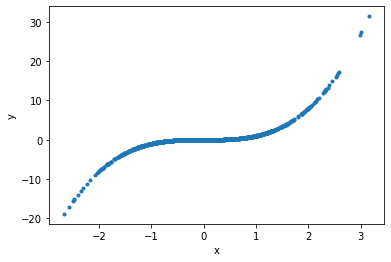

In [130]:
x = np.random.normal(0, 1, 1000)
y = x**3
plt.plot(x, y, '.')
plt.xlabel("x")
plt.ylabel("y")

cor_p = np.corrcoef(x, y)[0, 1]
cor_sp, _ = spearmanr(x, y)
cor_k, _ = kendalltau(x, y)
print(cor_p, cor_sp, cor_k)

In [ ]:
# Generemos estructuras de dependencia: Normal Bivariante
mu = [0, 0] # Vector de medias
rho = 0.9 # Cantidad de correlación

sigma =  [[1, rho], [rho, 1]] # Matriz de covarianza
n = 1000 # Cantidad de datos, tamaño de muestra
X = np.random.multivariate_normal(mu, sigma, n)

plt.plot(X[:, 0], X[:, 1], '.', alpha=0.5)
plt.grid()
plt.show()

# Relación entre Kendall y Spearman

In [54]:
# Kendall vs Spearman
corres = np.linspace(-1, 1, 500)
v_cor_p = np.zeros(len(corres))
v_cor_sp = np.zeros(len(corres))
v_cor_k = np.zeros(len(corres))
n = 1000 # Tamaño de muestra
for i in range(len(corres)):
    a = corres[i]
    sigma = [[1, a], [a, 1]] # Matriz de covarianza
    X = np.random.multivariate_normal(mu, sigma, n)
    v_cor_p[i] = np.corrcoef(X[:,0], X[:,1])[0, 1]
    v_cor_sp[i], _ = spearmanr(X[:,0], X[:,1])
    v_cor_k[i], _ = kendalltau(X[:,0], X[:,1])


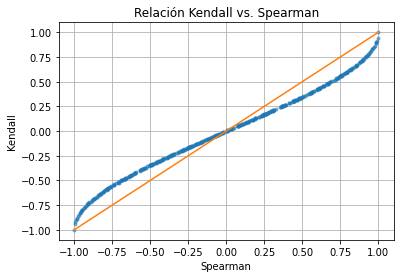

In [70]:
plt.plot(v_cor_sp, v_cor_k, '.', alpha=0.5)
plt.plot([-1, 1], [-1, 1])
plt.ylabel("Kendall")
plt.xlabel("Spearman")
plt.title("Relación Kendall vs. Spearman")
plt.grid()

## FALENCIAS DE LA CORRELACIÓN DE PEARSON

### ¿Qué pasa con contaminaciones de datos?

0.7963690400324934 0.4647011727011727 0.30566566566566566


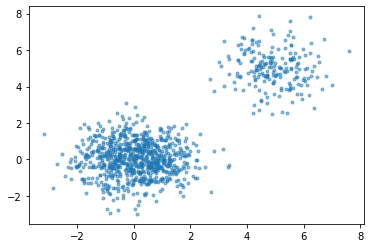

In [93]:
# QUE PASA CON CONTAMINACIONES DE DATOS 
### 20% de contaminación

X_lim = np.random.multivariate_normal([0,0], np.diag([1,1]),  800) # Datos limpios
X_cont = np.random.multivariate_normal([5,5], np.diag([1,1]), 200) # Datos Ccontaminados
X = np.concatenate((X_lim, X_cont), axis = 0)

plt.plot(X[:,0], X[:,1], '.', alpha = 0.5)
cor_p = np.corrcoef(X[:,0], X[:,1])[0, 1]
cor_sp, _ = spearmanr(X[:,0], X[:,1])
cor_k, _ = kendalltau(X[:,0], X[:,1])
print(cor_p, cor_sp, cor_k)

0.17724829947307646 0.6506516306516307 0.4837677677677678


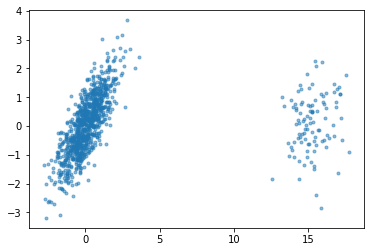

In [97]:
### 10% de contaminación

sig = [[1, 0.8], [0.8, 1]]
X_lim = np.random.multivariate_normal([0, 0], sig,  900) # Datos limpios
X_cont = np.random.multivariate_normal([15, 0], np.diag([1,1]), 100) # Datos Ccontaminados
X = np.concatenate((X_lim, X_cont), axis = 0)

plt.plot(X[:,0], X[:,1], '.', alpha = 0.5)
cor_p = np.corrcoef(X[:,0], X[:,1])[0, 1]
cor_sp, _ = spearmanr(X[:,0], X[:,1])
cor_k, _ = kendalltau(X[:,0], X[:,1])
print(cor_p, cor_sp, cor_k)


# Script Clase 2

## Ejemplo 1: Modelo RLS simulado
$y = ax+b$

3.017520618307975 4.88010555665079


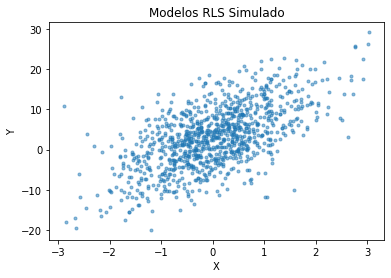

In [143]:

a = 3 # Intercepto teórico
b = 5 # Pendiente (slope) teórica
n = 1000 # Cantidad de datos
x = np.random.normal(size = n) # Datos de x: Variable Explicativa o Predictora
e = np.random.normal(size = n , loc = 0, scale = 6) # Error aleatorio
y = a + (b*x) + e # Datos de y: Variable Respuesta

########################## Grafiquemos nuestra simulación #############################
plt.plot(x, y, '.', alpha = 0.5)
plt.title("Modelos RLS Simulado")
plt.xlabel("X")
plt.ylabel("Y")

######################## Estimemos los coeficientes del modelo ########################
b1 = np.cov(x, y)[0,1]/np.cov(x) ## Pendiente estimada # Cov(x, y)/Var(x)
b0 = np.mean(y)- b1*np.mean(x) # Intercepto estimado
print(b0, b1)
# B1: A cambios unitarios en X el valor de Y cambia EN PROMEDIO 5.26 unidades
# B0: El valor de Y cuando X = 0.

# TAREA: REPITA 1000 veces este proceso de estimación de los coeficientes de regresión
# Guardarlos en un vector y graficar el histograma respectivo y analizarlo

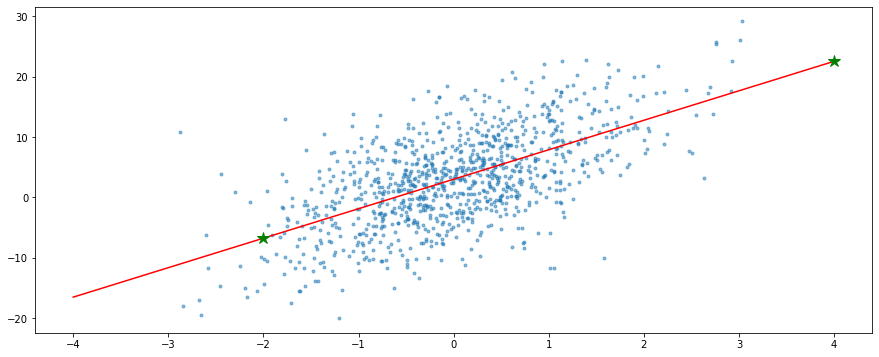

In [175]:
# Grafiquemos la recta de regresión
x1 = np.linspace(-4, 4, 200)
y1 = b0 + (b1*x1)
x_predicho = -2 # Punto a evaluar: Deseamos conocer su valor Y gorro
y_predicho = b0 + (b1*x_predicho) # Y gorro para x.predicho
x_predicho2 = 4 # Punto a evaluar: Deseamos conocer su valor Y gorro
y_predicho2 = b0 + (b1*x_predicho2) # Y gorro para x.predicho2

plt.figure(figsize = (15, 6))
plt.plot(x, y, '.', alpha = 0.5)
plt.plot(x1, y1, color = "red")

### Ubiquemos el primero punto
plt.plot(x_predicho, y_predicho , color = "green", marker = '*', markersize = 12)

### Ahora ubiquemos el segundo punto
plt.plot(x_predicho2, y_predicho2 , color = "green", marker = '*', markersize = 12)


### Para validar los supuestos del modelo
1. Independencia --- Test de Autocorrelación Durbin-Watson
2. Normalidad --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling
3. Esperanza cero --- One sample t-test
4. Varianza constante: Homocedasticidad --- Test Breusch-Pagan

2.1759966491712226


Text(0, 0.5, 'Residuales')

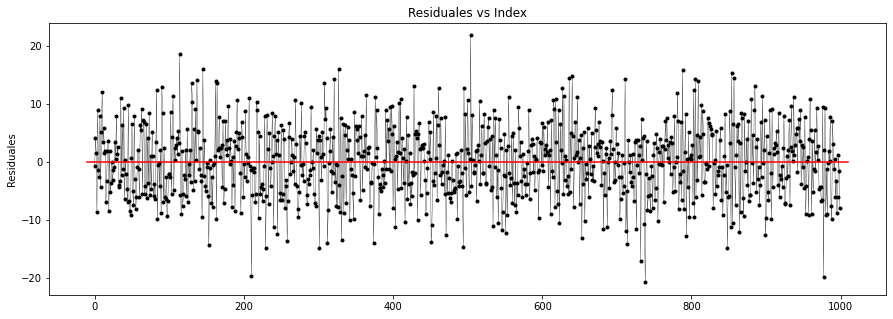

In [196]:
from statsmodels.stats.stattools import durbin_watson

# Validemos los supuestos
y_hat = b0 + (b1*x) # Valores Y gorro
e_i = y - y_hat # Residuales estimados

# 1) Independencia
# Ho: Corr(E_i,E_i+1) = 0 vs Ha: Corr(E_i,E_i+1) != 0
print(durbin_watson(e_i)) # Si el resultado es cercano a 2, entonces NO SE RECHAZA Ho
# within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

from scipy.stats import ttest_1samp
# 3) Media cero
# Ho: E[E_i] = 0 vs Ha: E[E_i] != 0
print(ttest_1samp(e_i, 0)) # Si el P-Value < alpha (0.05), entonces rechazo Ho

# Gráfico de Residuales vs Index
plt.figure(figsize = (15, 5))
plt.plot(e_i, '.-', color = "black", linewidth = 0.3)
plt.plot([-10, 1010], [0, 0], color = "red")
plt.title("Residuales vs Index")
plt.ylabel("Residuales")

ShapiroResult(statistic=0.9987109899520874, pvalue=0.6959291696548462)


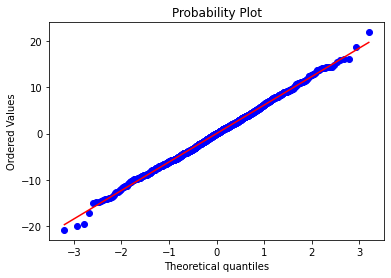

{'whiskers': [<matplotlib.lines.Line2D at 0x1ceaab50f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ceaab5f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ceaab429d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ceaab5fdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ceaab6b190>],
 'means': []}

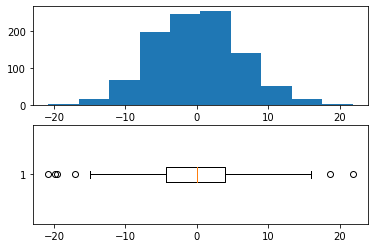

In [211]:
from scipy.stats import shapiro
import scipy.stats as stats
import pylab 
# 2) Normalidad
# Ho: E_i ~ Normal vs Ha: E_i !~ Normal
print(shapiro(e_i)) # Si el P-Value < alpha (0.05), entonces rechazo Ho
# Gráfico QQ-plot de Normalidad
stats.probplot(e_i, dist="norm", plot=pylab)
pylab.show()

plt.subplot(2, 1, 1)
plt.hist(e_i)#, col = "gray", main = "Histograma de los Residuales")
plt.subplot(2, 1, 2)
plt.boxplot(e_i, vert = False)#, main = "Boxplot de los Residuales", xlab = "Residuales", horizontal = T)



1.2656292635297994 0.18833407753834636 No significant heteroskedasticity.


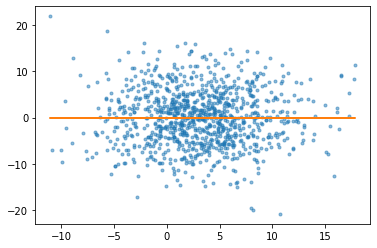

In [246]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import chi2

# 4) Homocedasticidad
# Ho: V[E_i] = cte vs Ha: V[E_i] != cte

def breusch_pagan_test(x, y):
    '''
    Breusch-Pagan test for heteroskedasticity in a linear regression model:
    H_0 = No heteroskedasticity.
    H_1 = Heteroskedasticity is present.

    Inputs:
    x = a numpy.ndarray containing the predictor variables. Shape = (nSamples, nPredictors).
    y = a 1D numpy.ndarray containing the response variable. Shape = (nSamples, ).

    Outputs a list containing three elements:
    1. the Breusch-Pagan test statistic.
    2. the p-value for the test.
    3. the test result.
    '''

    if y.ndim != 1:
        raise SystemExit('Error: y has more than 1 dimension.')
    if x.shape[0] != y.shape[0]:
        raise SystemExit('Error: the number of samples differs between x and y.')
    else:
        n_samples = y.shape[0]

    # fit an OLS linear model to y using x:
    lm = LinearRegression()
    lm.fit(x, y)

    # calculate the squared errors:
    err = (y - lm.predict(x))**2

    # fit an auxiliary regression to the squared errors:
    # why?: to estimate the variance in err explained by x
    lm.fit(x, err)
    pred_err = lm.predict(x)
    del lm

    # calculate the coefficient of determination:
    ss_tot = sum((err - np.mean(err))**2)
    ss_res = sum((err - pred_err)**2)
    r2 = 1 - (ss_res / ss_tot)
    del err, pred_err, ss_res, ss_tot

    # calculate the Lagrange multiplier:
    LM = n_samples * r2
    del r2

    # calculate p-value. degrees of freedom = number of predictors.
    # this is equivalent to (p - 1) parameter restrictions in Wikipedia entry.
    pval = chi2.pdf(LM, x.shape[1])

    if pval < 0.01:
        test_result = 'Heteroskedasticity present at 99% CI.'
    elif pval < 0.05:
        test_result = 'Heteroskedasticity present at 95% CI.'
    else:
        test_result = 'No significant heteroskedasticity.'
    return [LM, pval, test_result]

LM, pvalue, result = breusch_pagan_test(x.reshape(-1,1), y)
print(LM, pvalue, result)

# Gráfico de Residuales vs Predichos (Ajustados) --- e.i vs y.hat
plt.plot(y_hat, e_i, '.', alpha = 0.5)
plt.plot(y_hat, np.zeros(len(y_hat)))


## NOTA: SI ALGÚN SUPUESTO FALLA, ENTONCES EL MODELO DEBE DESCARTARSE

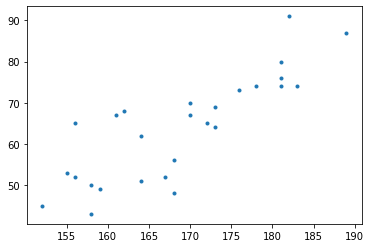

In [256]:
# EJEMPLO APLICADO
import pandas as pd

medifis = pd.read_excel("datos.xls", sheet_name = "Medifis", header = 2)
medifis.head()

estatura = medifis['Estatura (cm)']
peso = medifis['Peso (Kg)']
plt.plot(estatura, peso, '.')

In [262]:
import statsmodels.api as sm

# Ejecutemos un modelo lineal (RLS)
X = sm.add_constant(estatura)
model = sm.OLS(peso,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Peso (Kg)   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     55.46
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           8.45e-08
Time:                        18:09:32   Log-Likelihood:                -90.859
No. Observations:                  27   AIC:                             185.7
Df Residuals:                      25   BIC:                             188.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -112.0497     23.666     -4.735

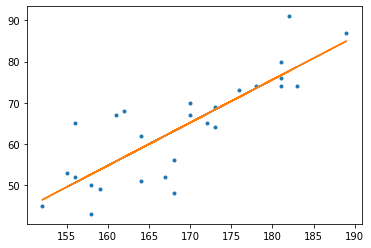

In [274]:
# EJEMPLO APLICADO
import pandas as pd

b0 = results.params[0]
b1 = results.params[1]

y_hat = b0 + (b1*estatura) # Valores Y gorro
e_i = results.resid # Residuales estimados

plt.plot(estatura, peso, '.')
plt.plot(estatura, y_hat)

2.1260323618866606
Ttest_1sampResult(statistic=-3.7944490214637446e-14, pvalue=0.99999999999997)


Text(0, 0.5, 'Residuales')

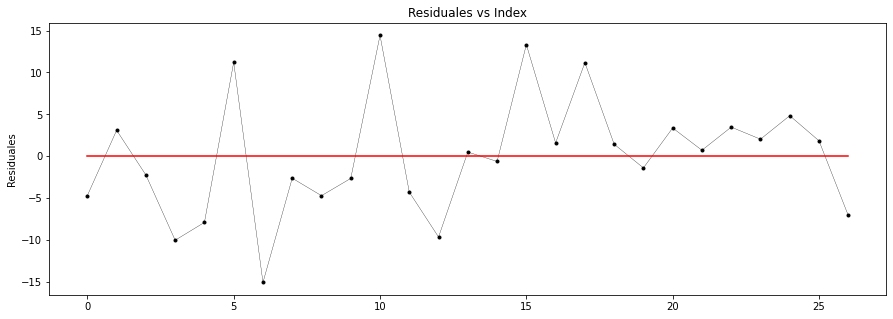

In [277]:
# 1) Independencia
# Ho: Corr(E_i,E_i+1) = 0 vs Ha: Corr(E_i,E_i+1) != 0
print(durbin_watson(e_i)) # Si el resultado es cercano a 2, entonces NO SE RECHAZA Ho
# within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

from scipy.stats import ttest_1samp
# 3) Media cero
# Ho: E[E_i] = 0 vs Ha: E[E_i] != 0
print(ttest_1samp(e_i, 0)) # Si el P-Value < alpha (0.05), entonces rechazo Ho

# Gráfico de Residuales vs Index
plt.figure(figsize = (15, 5))
plt.plot(e_i, '.-', color = "black", linewidth = 0.3)
plt.plot([0, 26], [0, 0], color = "red")
plt.title("Residuales vs Index")
plt.ylabel("Residuales")

ShapiroResult(statistic=0.9696379899978638, pvalue=0.5922738313674927)


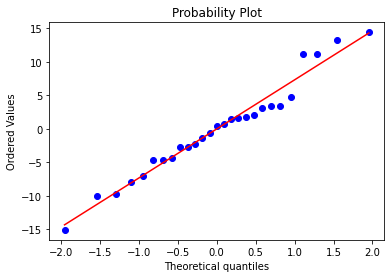

{'whiskers': [<matplotlib.lines.Line2D at 0x1ceb1b8f430>,
 'caps': [<matplotlib.lines.Line2D at 0x1ceb1b8fb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ceb1b8f0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ceb186c2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ceb186c640>],
 'means': []}

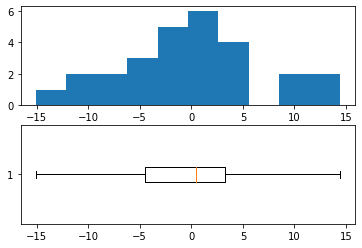

In [278]:
# 2) Normalidad
# Ho: E_i ~ Normal vs Ha: E_i !~ Normal
print(shapiro(e_i)) # Si el P-Value < alpha (0.05), entonces rechazo Ho
# Gráfico QQ-plot de Normalidad
stats.probplot(e_i, dist="norm", plot=pylab)
pylab.show()

plt.subplot(2, 1, 1)
plt.hist(e_i)#, col = "gray", main = "Histograma de los Residuales")
plt.subplot(2, 1, 2)
plt.boxplot(e_i, vert = False)#, main = "Boxplot de los Residuales", xlab = "Residuales", horizontal = T)

1.2656292635297994 0.18833407753834636 No significant heteroskedasticity.


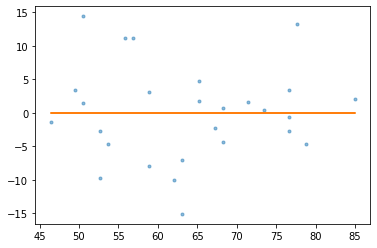

In [279]:
# 4) Homocedasticidad
LM, pvalue, result = breusch_pagan_test(x.reshape(-1,1), y)
print(LM, pvalue, result)

# Gráfico de Residuales vs Predichos (Ajustados) --- e.i vs y.hat
plt.plot(y_hat, e_i, '.', alpha = 0.5)
plt.plot(y_hat, np.zeros(len(y_hat)))

